Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [2]:
dataframe = pd.read_csv("Company_Data.csv")

## EDA and Data Preprocessing

In [3]:
dataframe.head(3)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes

In [4]:
dataframe.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
dataframe.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

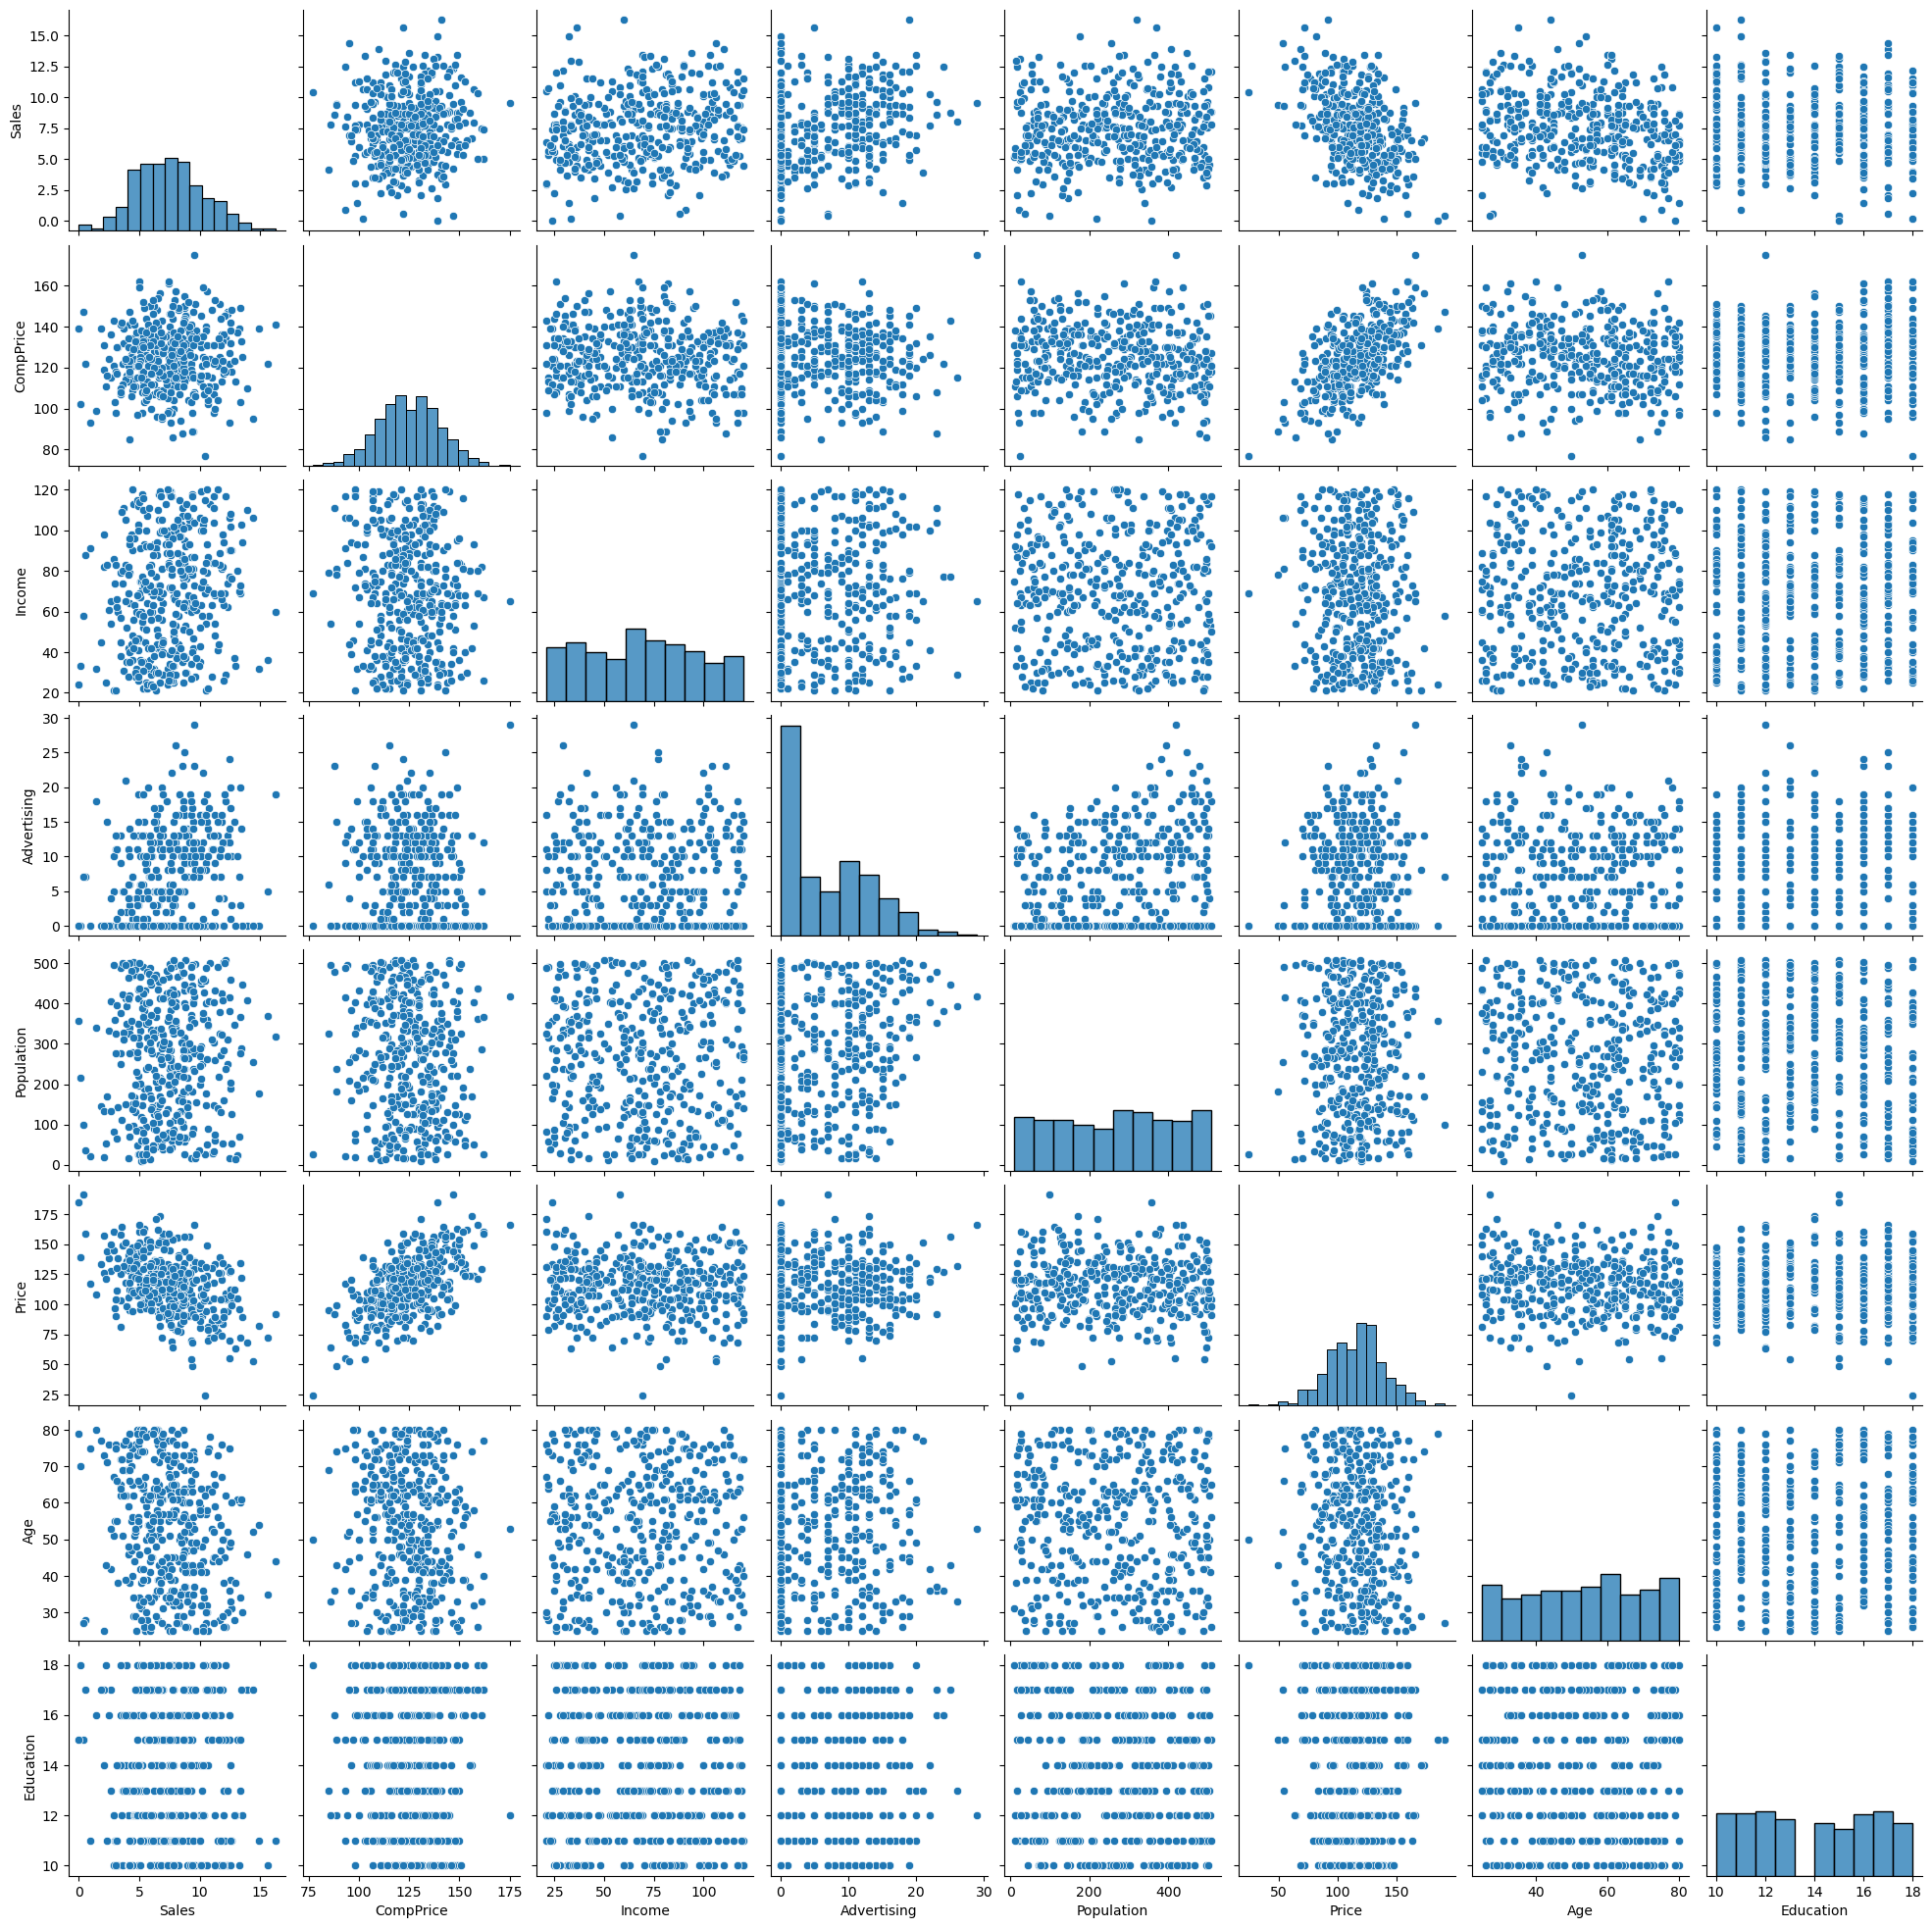

In [7]:
sns.pairplot(dataframe)
plt.show()

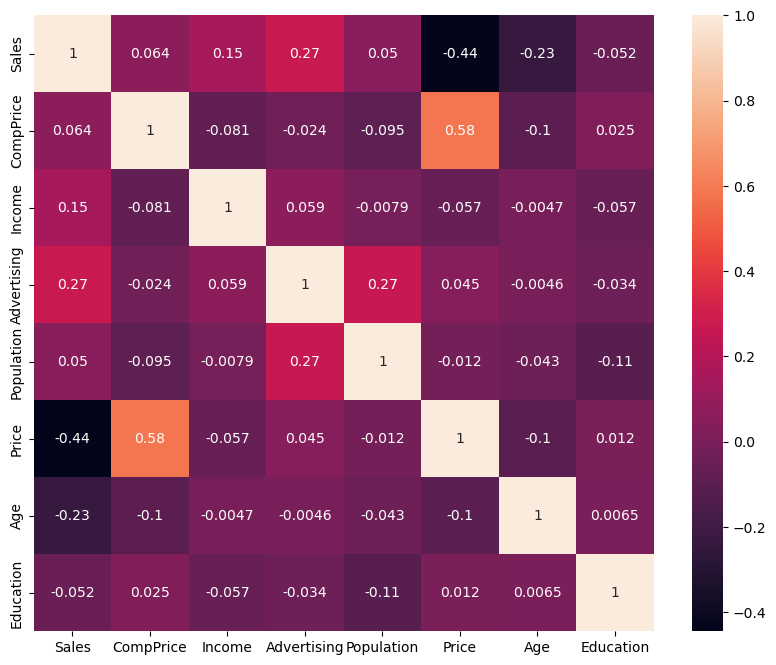

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(dataframe.corr(numeric_only=True),annot=True,)
plt.show()

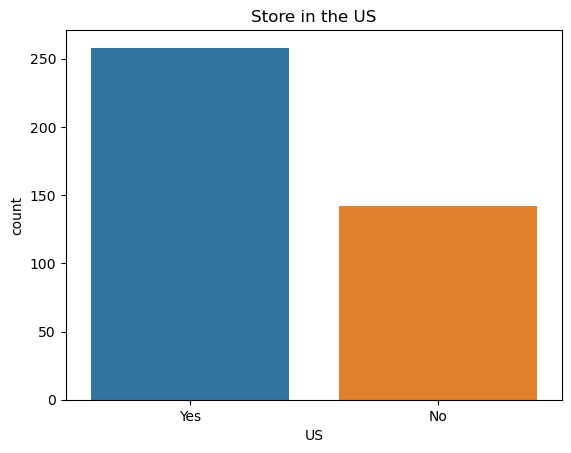

In [9]:
sns.countplot(x=dataframe['US'])
plt.title("Store in the US")
plt.show()

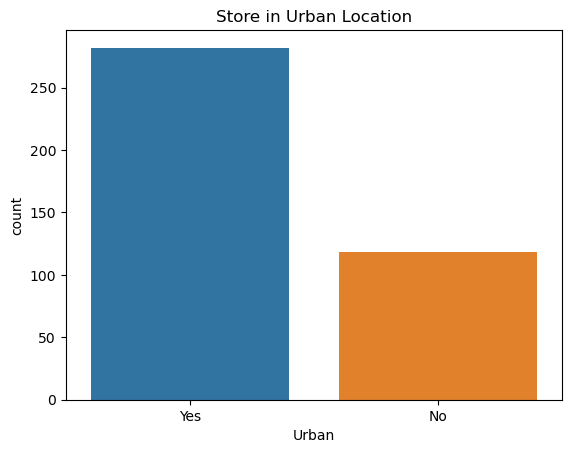

In [10]:
sns.countplot(x=dataframe['Urban'])
plt.title("Store in Urban Location")
plt.show()

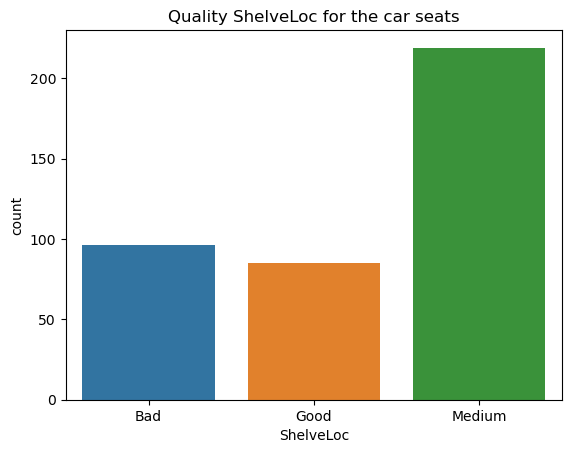

In [11]:
sns.countplot(x=dataframe['ShelveLoc'])
plt.title("Quality ShelveLoc for the car seats")
plt.show()

## Approach I :- Converting Every Continuous Features into category, relying on the alogrithm  to decide the limits of 'bins' 

In [12]:
df = dataframe.copy()

In [13]:
from pandas.api.types import is_numeric_dtype
for column in dataframe.columns :
    if is_numeric_dtype(dataframe[column]):
        dataframe[column] = pd.cut(dataframe[column], bins=3,labels=['Low','Medium','High'],right = False)
    else:
        pass

In [14]:
dataframe.head(10)

Sales CompPrice  Income Advertising Population   Price ShelveLoc     Age  \
0  Medium    Medium  Medium      Medium     Medium  Medium       Bad     Low   
1    High    Medium     Low      Medium     Medium  Medium      Good    High   
2  Medium    Medium     Low      Medium     Medium  Medium    Medium  Medium   
3  Medium    Medium    High         Low       High  Medium    Medium  Medium   
4     Low    Medium  Medium         Low     Medium  Medium       Bad     Low   
5  Medium    Medium    High      Medium       High     Low       Bad    High   
6  Medium    Medium    High         Low        Low  Medium    Medium    High   
7    High    Medium  Medium      Medium       High  Medium      Good    High   
8  Medium    Medium    High         Low        Low  Medium    Medium    High   
9     Low    Medium    High         Low        Low  Medium    Medium    High   

  Education Urban   US  
0      High   Yes  Yes  
1       Low   Yes  Yes  
2       Low   Yes  Yes  
3    Medium   Yes  Yes  
4    Medium   Yes   No  
5      High    No  Yes  
6    Medium   Yes   No  
7       Low   Yes  Yes  
8       Low    No   No  
9      High    No  Yes

In [15]:
le = LabelEncoder()
for column in dataframe.columns:
    dataframe[column] = le.fit_transform(dataframe[column])

In [16]:
dataframe.head(10)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      2          2       2            2           2      2          0    1   
1      0          2       1            2           2      2          1    0   
2      2          2       1            2           2      2          2    2   
3      2          2       0            1           0      2          2    2   
4      1          2       2            1           2      2          0    1   
5      2          2       0            2           0      1          0    0   
6      2          2       0            1           1      2          2    0   
7      0          2       2            2           0      2          1    0   
8      2          2       0            1           1      2          2    0   
9      1          2       0            1           1      2          2    0   

   Education  Urban  US  
0          0      1   1  
1          1      1   1  
2          1      1   1  
3          2      1   1  
4          2      1   0  
5          0      0   1  
6          2      1   0  
7          1      1   1  
8          1      0   0  
9          0      0   1

In [17]:
y = dataframe.iloc[:,0]
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

In [18]:
x = dataframe.iloc[:,1:]
x.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          2       2            2           2      2          0    1   
1          2       1            2           2      2          1    0   
2          2       1            2           2      2          2    2   
3          2       0            1           0      2          2    2   
4          2       2            1           2      2          0    1   

   Education  Urban  US  
0          0      1   1  
1          1      1   1  
2          1      1   1  
3          2      1   1  
4          2      1   0

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

## a. Decision Tree Classification based on C5.0 Algorithm

In [20]:
model_c5 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
model_c5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

+ Plot the Decision Tree

<Figure size 800x800 with 0 Axes>

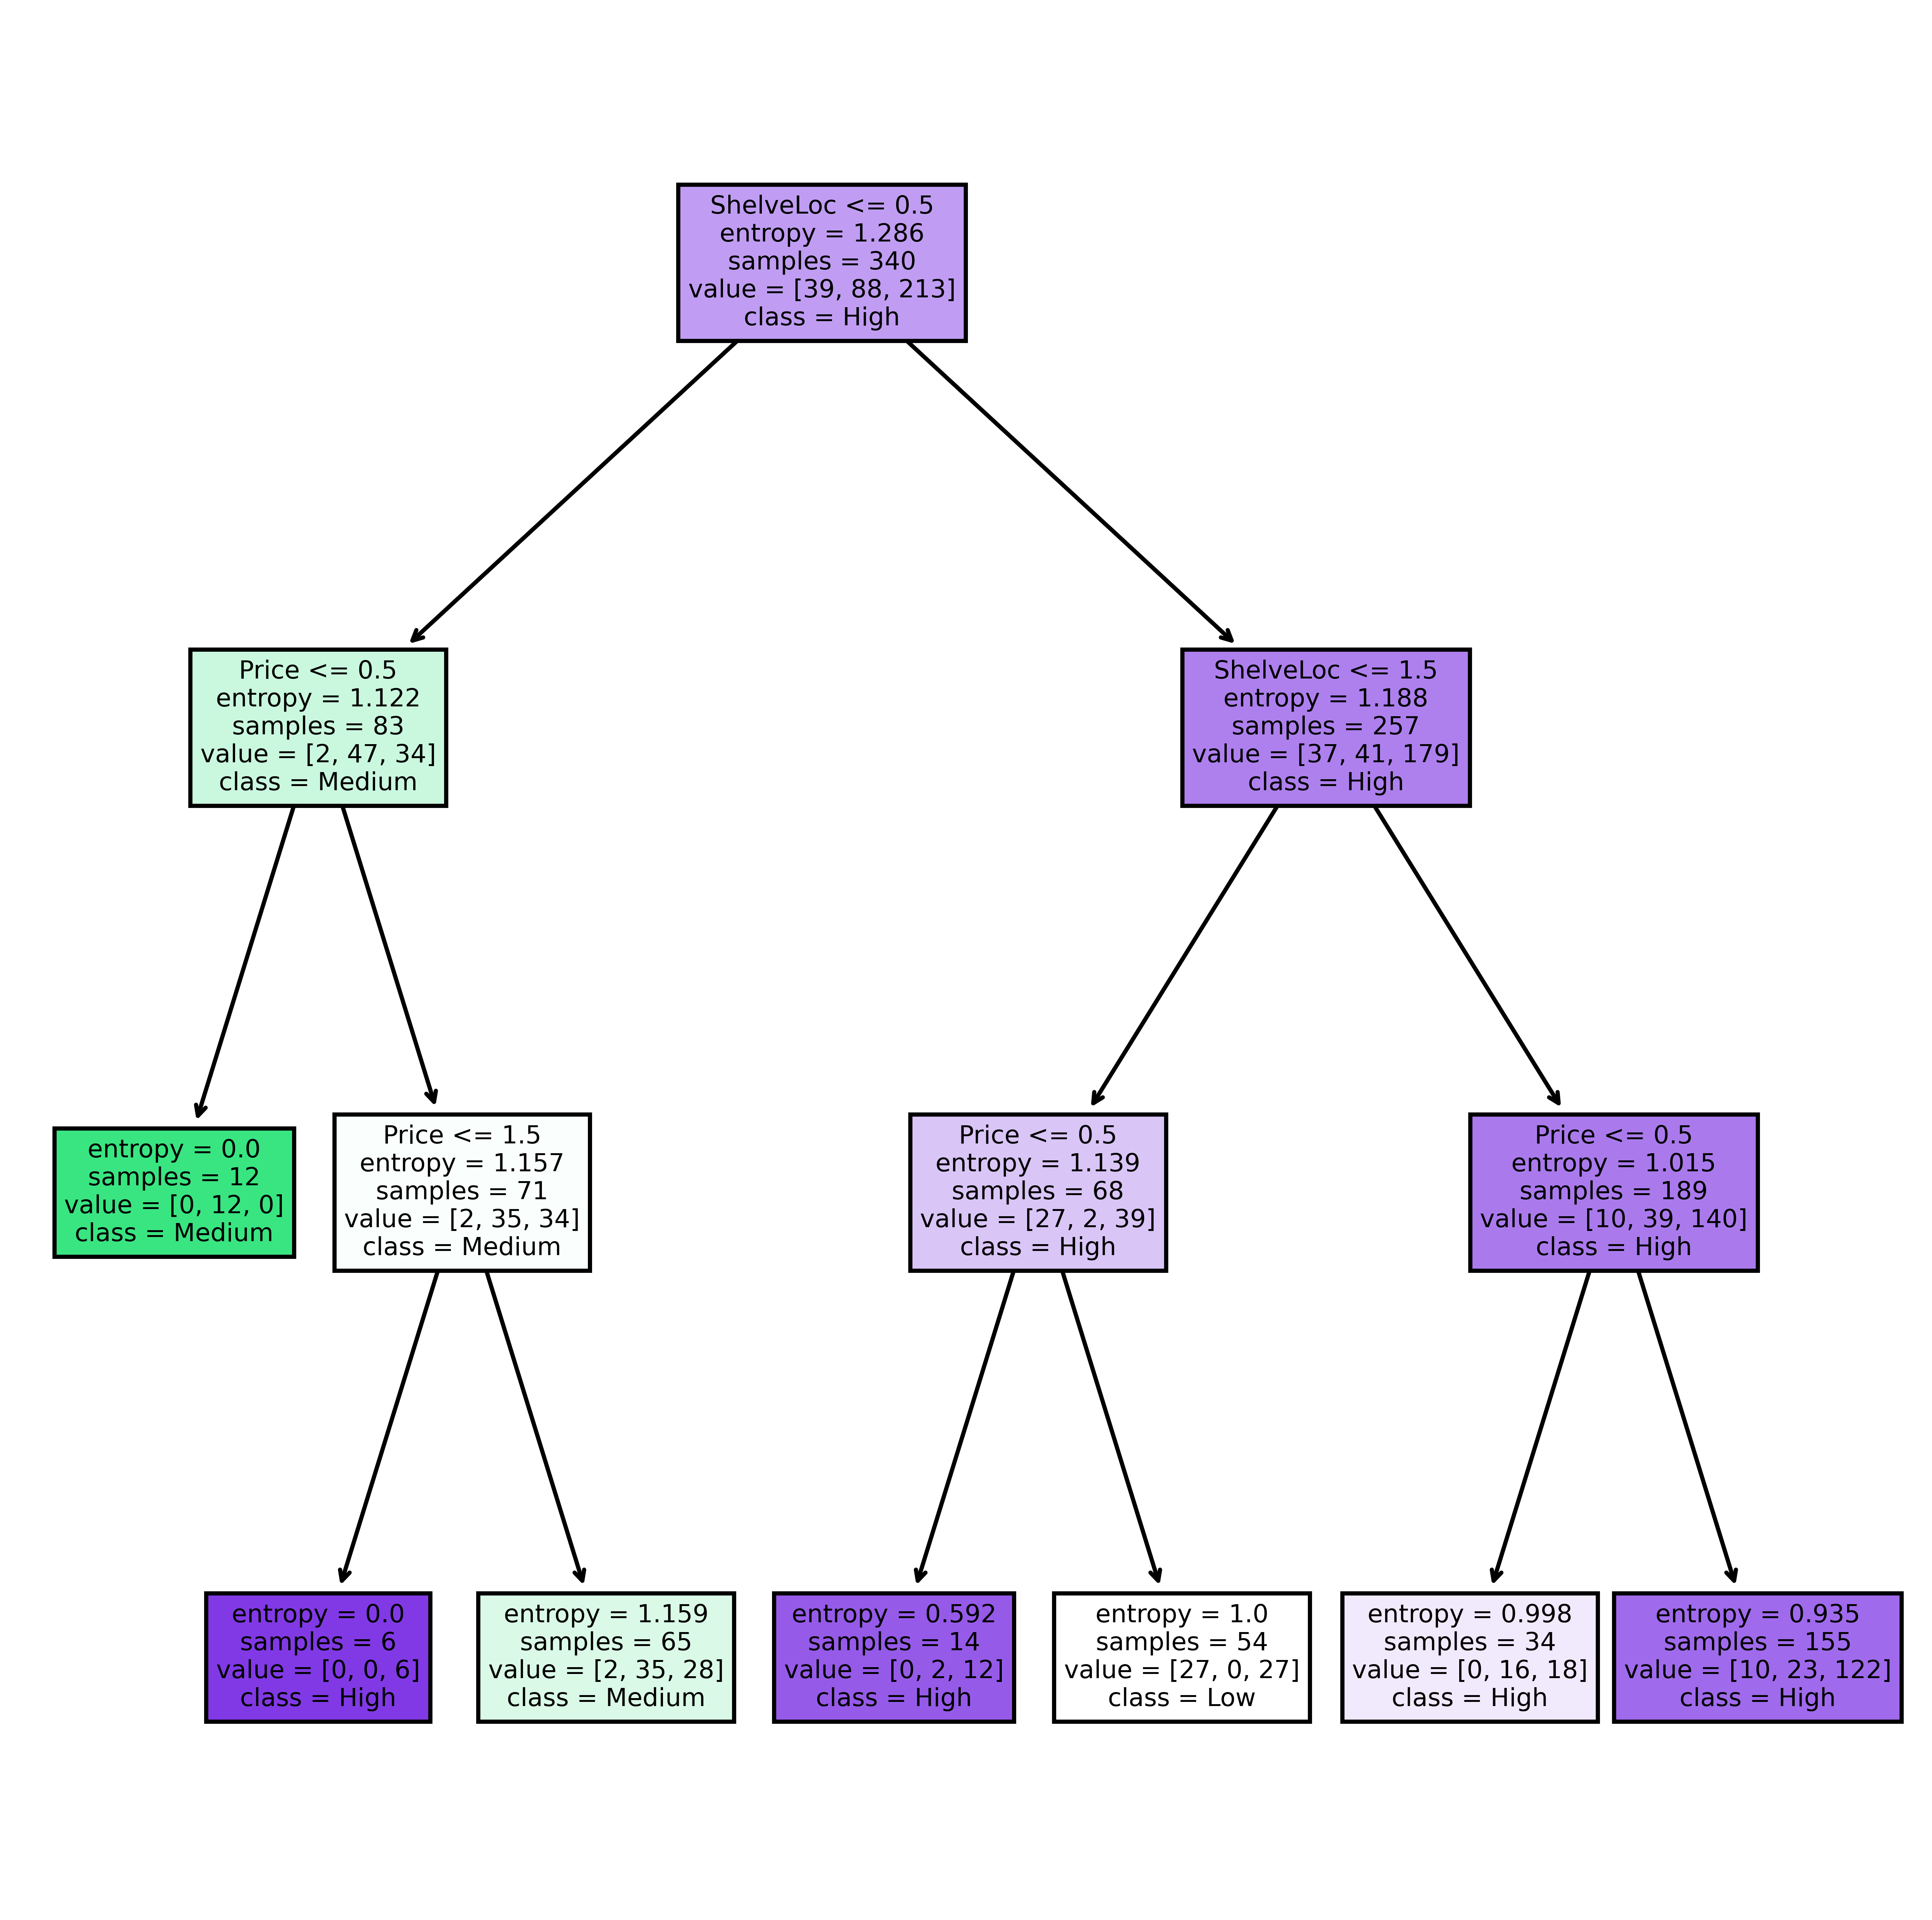

In [21]:
def plot_model(model):
    plt.figure(figsize=(8,8))
    ftn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
    cln = ['Low','Medium','High']
    fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,8), dpi=800)
    tree.plot_tree(model,feature_names=ftn,class_names=cln,filled=True)
    plt.show()
plot_model(model_c5)

## Test Data

In [22]:
test_pred = model_c5.predict(x_test)
print(f"The Training accuracy of the model is {model_c5.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {model_c5.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.6823529411764706

The Testing acuuracy of the model is 0.65

col_0  0  1   2
Sales          
0      9  0   3
1      0  7   7
2      5  6  23


## b. Decision Tree Classification based on CART Algorithm

In [23]:
model_cart = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<Figure size 800x800 with 0 Axes>

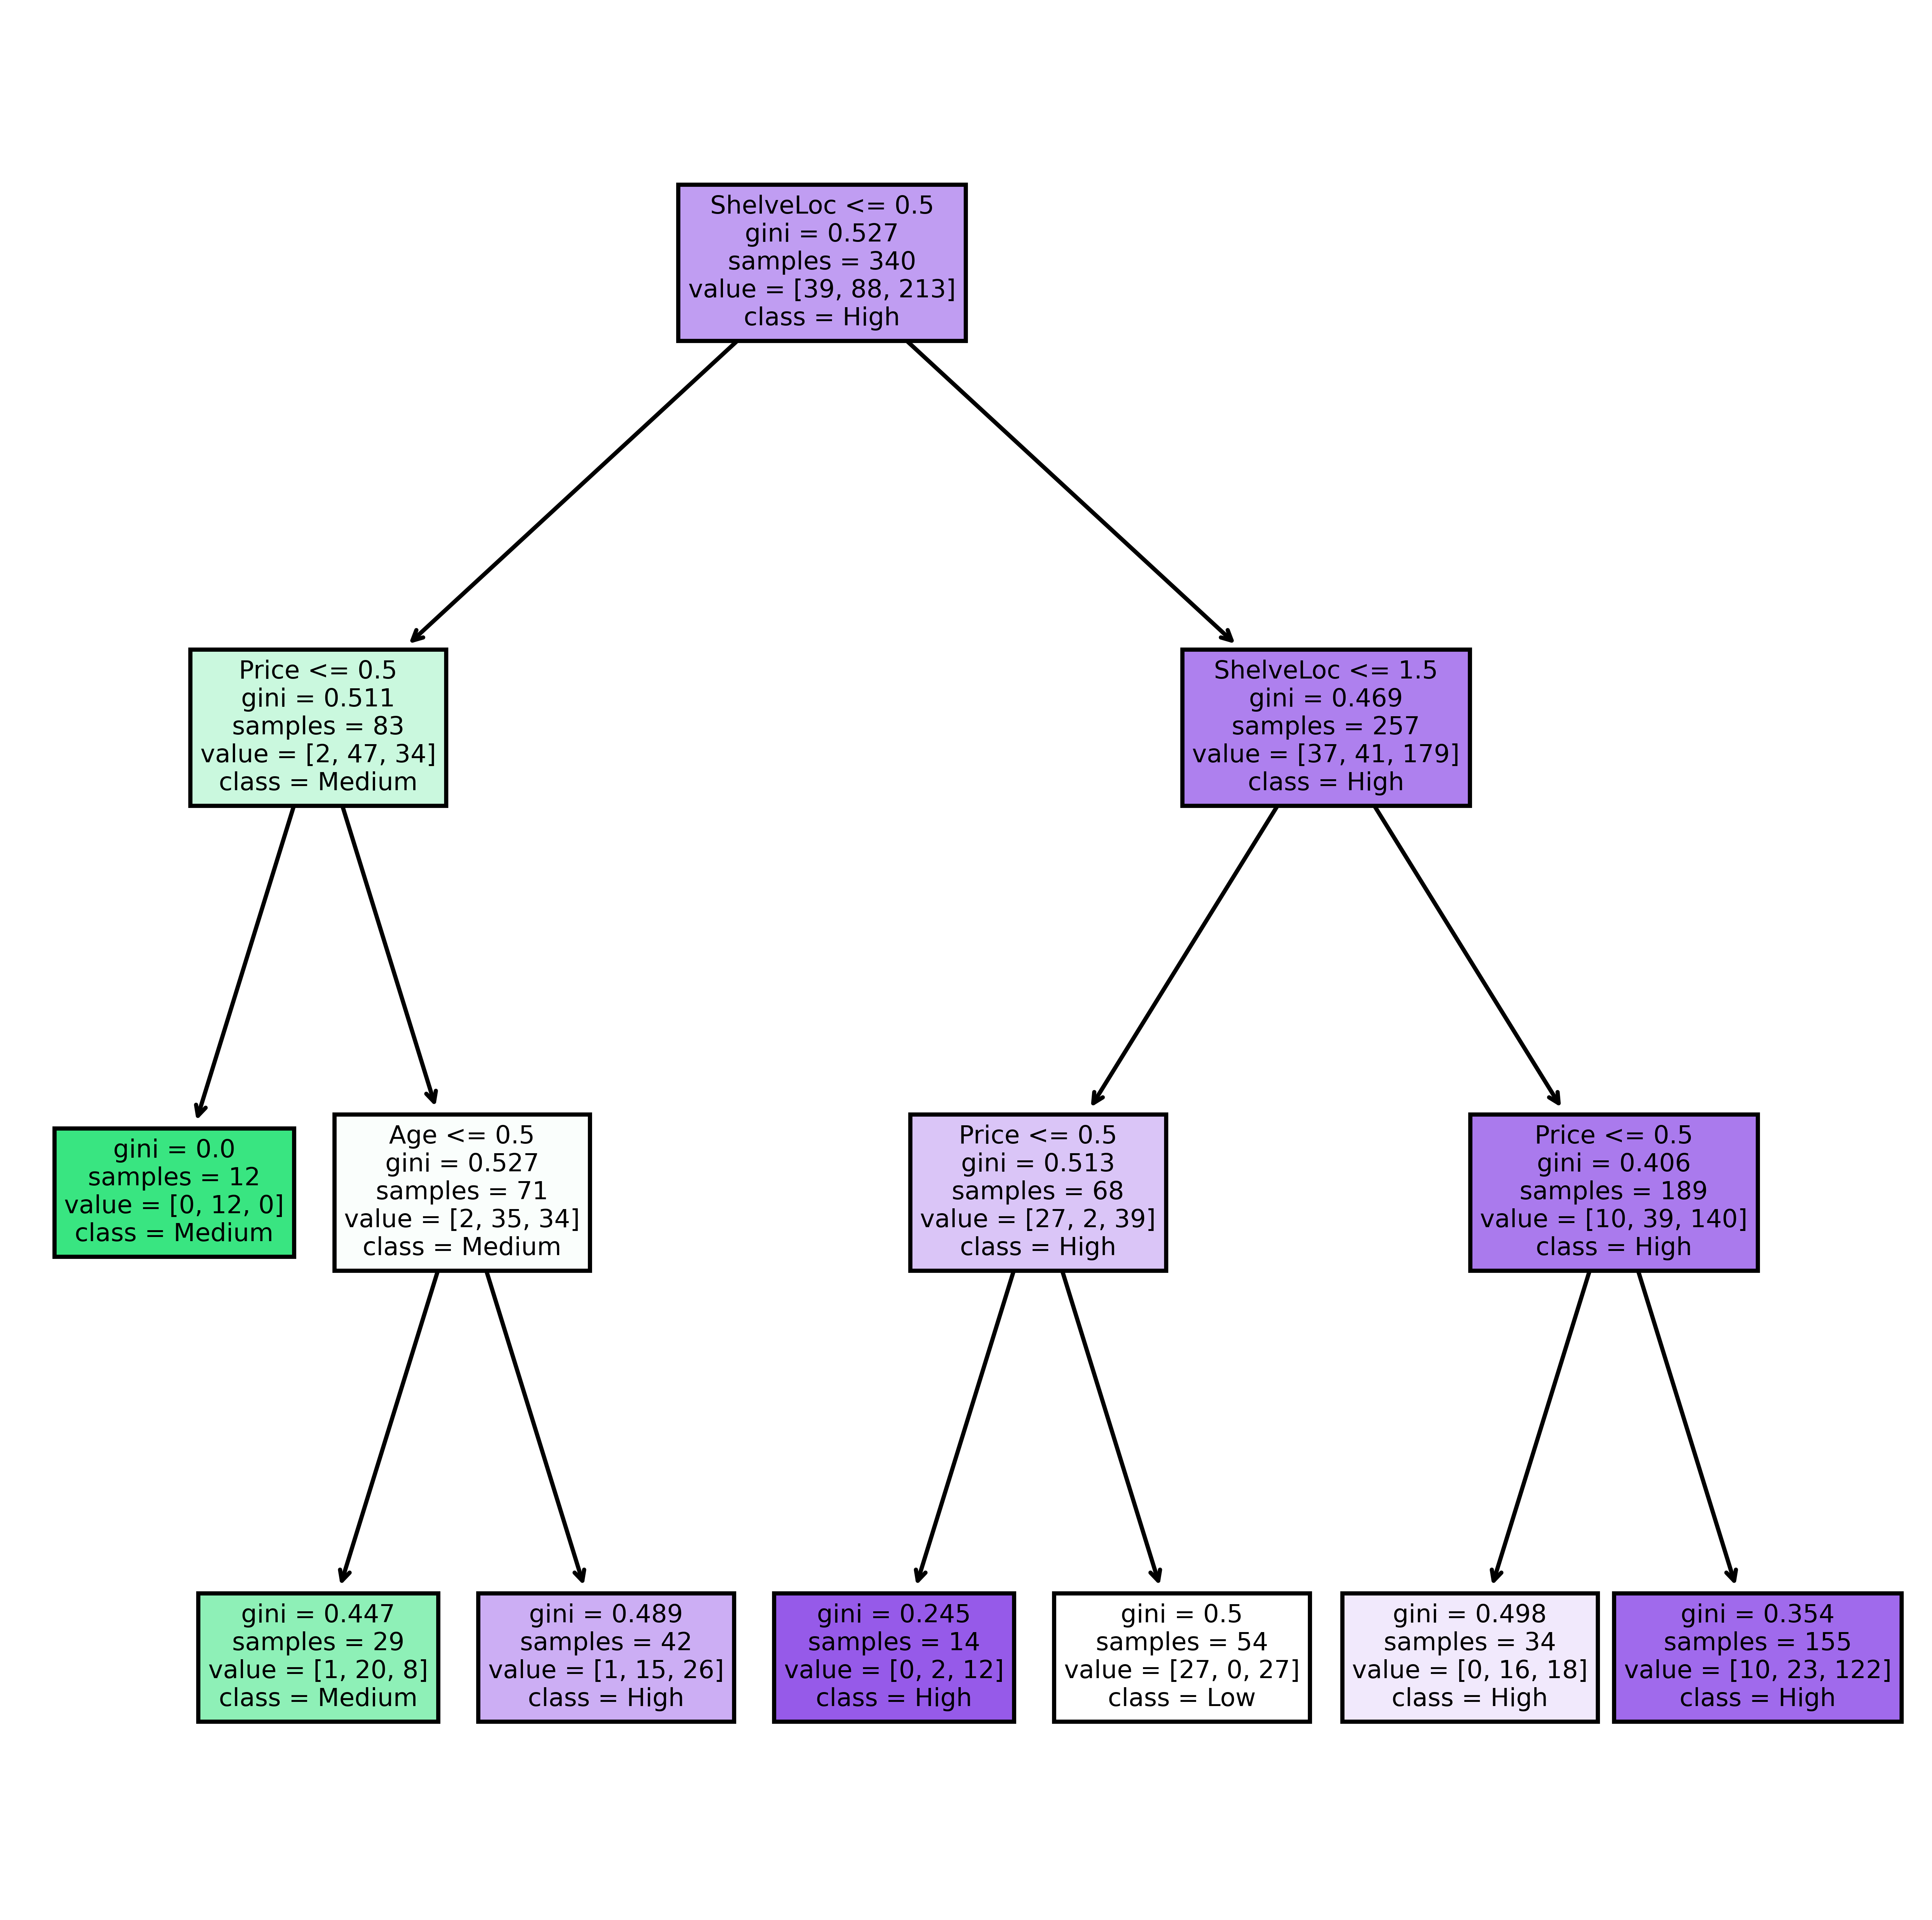

In [24]:
plot_model(model_cart)

## Test Data

In [25]:
test_pred = model_cart.predict(x_test)
print(f"The Training accuracy of the model is {model_cart.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {model_cart.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.6970588235294117

The Testing acuuracy of the model is 0.7166666666666667

col_0  0  1   2
Sales          
0      9  0   3
1      0  5   9
2      5  0  29


## Approch 2 :- Converting all the continus columns into categories individually and specifying the limits of every bin

In [26]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [27]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [28]:
# end limits decided after looking at percentile 
df['Sales'] = pd.cut(df['Sales'],bins=[0,6,8,16],right=False,labels=['Low','Medium','High'])
df['CompPrice'] = pd.cut(df['CompPrice'],bins=[77,120,130,175],right=False,labels=['Low','Medium','High'])
df['Income'] = pd.cut(df['Income'],bins = [21,50,80,120],right=False,labels=['Low','Medium','High'])
df['Advertising'] = pd.cut(df['Advertising'],bins=[0,3,10,29],right=False,labels=['Low','Medium','High'])
df['Population'] = pd.cut(df['Population'],bins=[10,250,370,509],right=False,labels=['Low','Medium','High'])
df['Price'] = pd.cut(df['Price'],bins=[24,115,125,191],right=False,labels=['Low','Medium','High'])
df['Age'] = pd.cut(df['Age'],bins=[25,45,70,80],right=False,labels=['Low','Medium','High'])
df['Education'] = pd.cut(df['Education'],bins=[10,13,15,18],right=False,labels=['Low','Medium','High'])
df.head()

Sales CompPrice  Income Advertising Population   Price ShelveLoc     Age  \
0    High      High  Medium        High     Medium  Medium       Bad     Low   
1    High       Low     Low        High     Medium     Low      Good  Medium   
2    High       Low     Low        High     Medium     Low    Medium  Medium   
3  Medium       Low    High      Medium       High     Low    Medium  Medium   
4     Low      High  Medium      Medium     Medium    High       Bad     Low   

  Education Urban   US  
0      High   Yes  Yes  
1       Low   Yes  Yes  
2       Low   Yes  Yes  
3    Medium   Yes  Yes  
4    Medium   Yes   No

In [29]:
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      0          0       2            0           2      2          0    1   
1      0          1       1            0           2      1          1    2   
2      0          1       1            0           2      1          2    2   
3      2          1       0            2           0      1          2    2   
4      1          0       2            2           2      0          0    1   

   Education  Urban  US  
0          0      1   1  
1          1      1   1  
2          1      1   1  
3          2      1   1  
4          2      1   0

In [30]:
Y = df.iloc[:,0]
Y.head()

0    0
1    0
2    0
3    2
4    1
Name: Sales, dtype: int32

In [31]:
X = df.iloc[:,1:]
X.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          0       2            0           2      2          0    1   
1          1       1            0           2      1          1    2   
2          1       1            0           2      1          2    2   
3          1       0            2           0      1          2    2   
4          0       2            2           2      0          0    1   

   Education  Urban  US  
0          0      1   1  
1          1      1   1  
2          1      1   1  
3          2      1   1  
4          2      1   0

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

## a. C5.0 Algorithm

In [33]:
ent_mod_c5 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
ent_mod_c5.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

<Figure size 800x800 with 0 Axes>

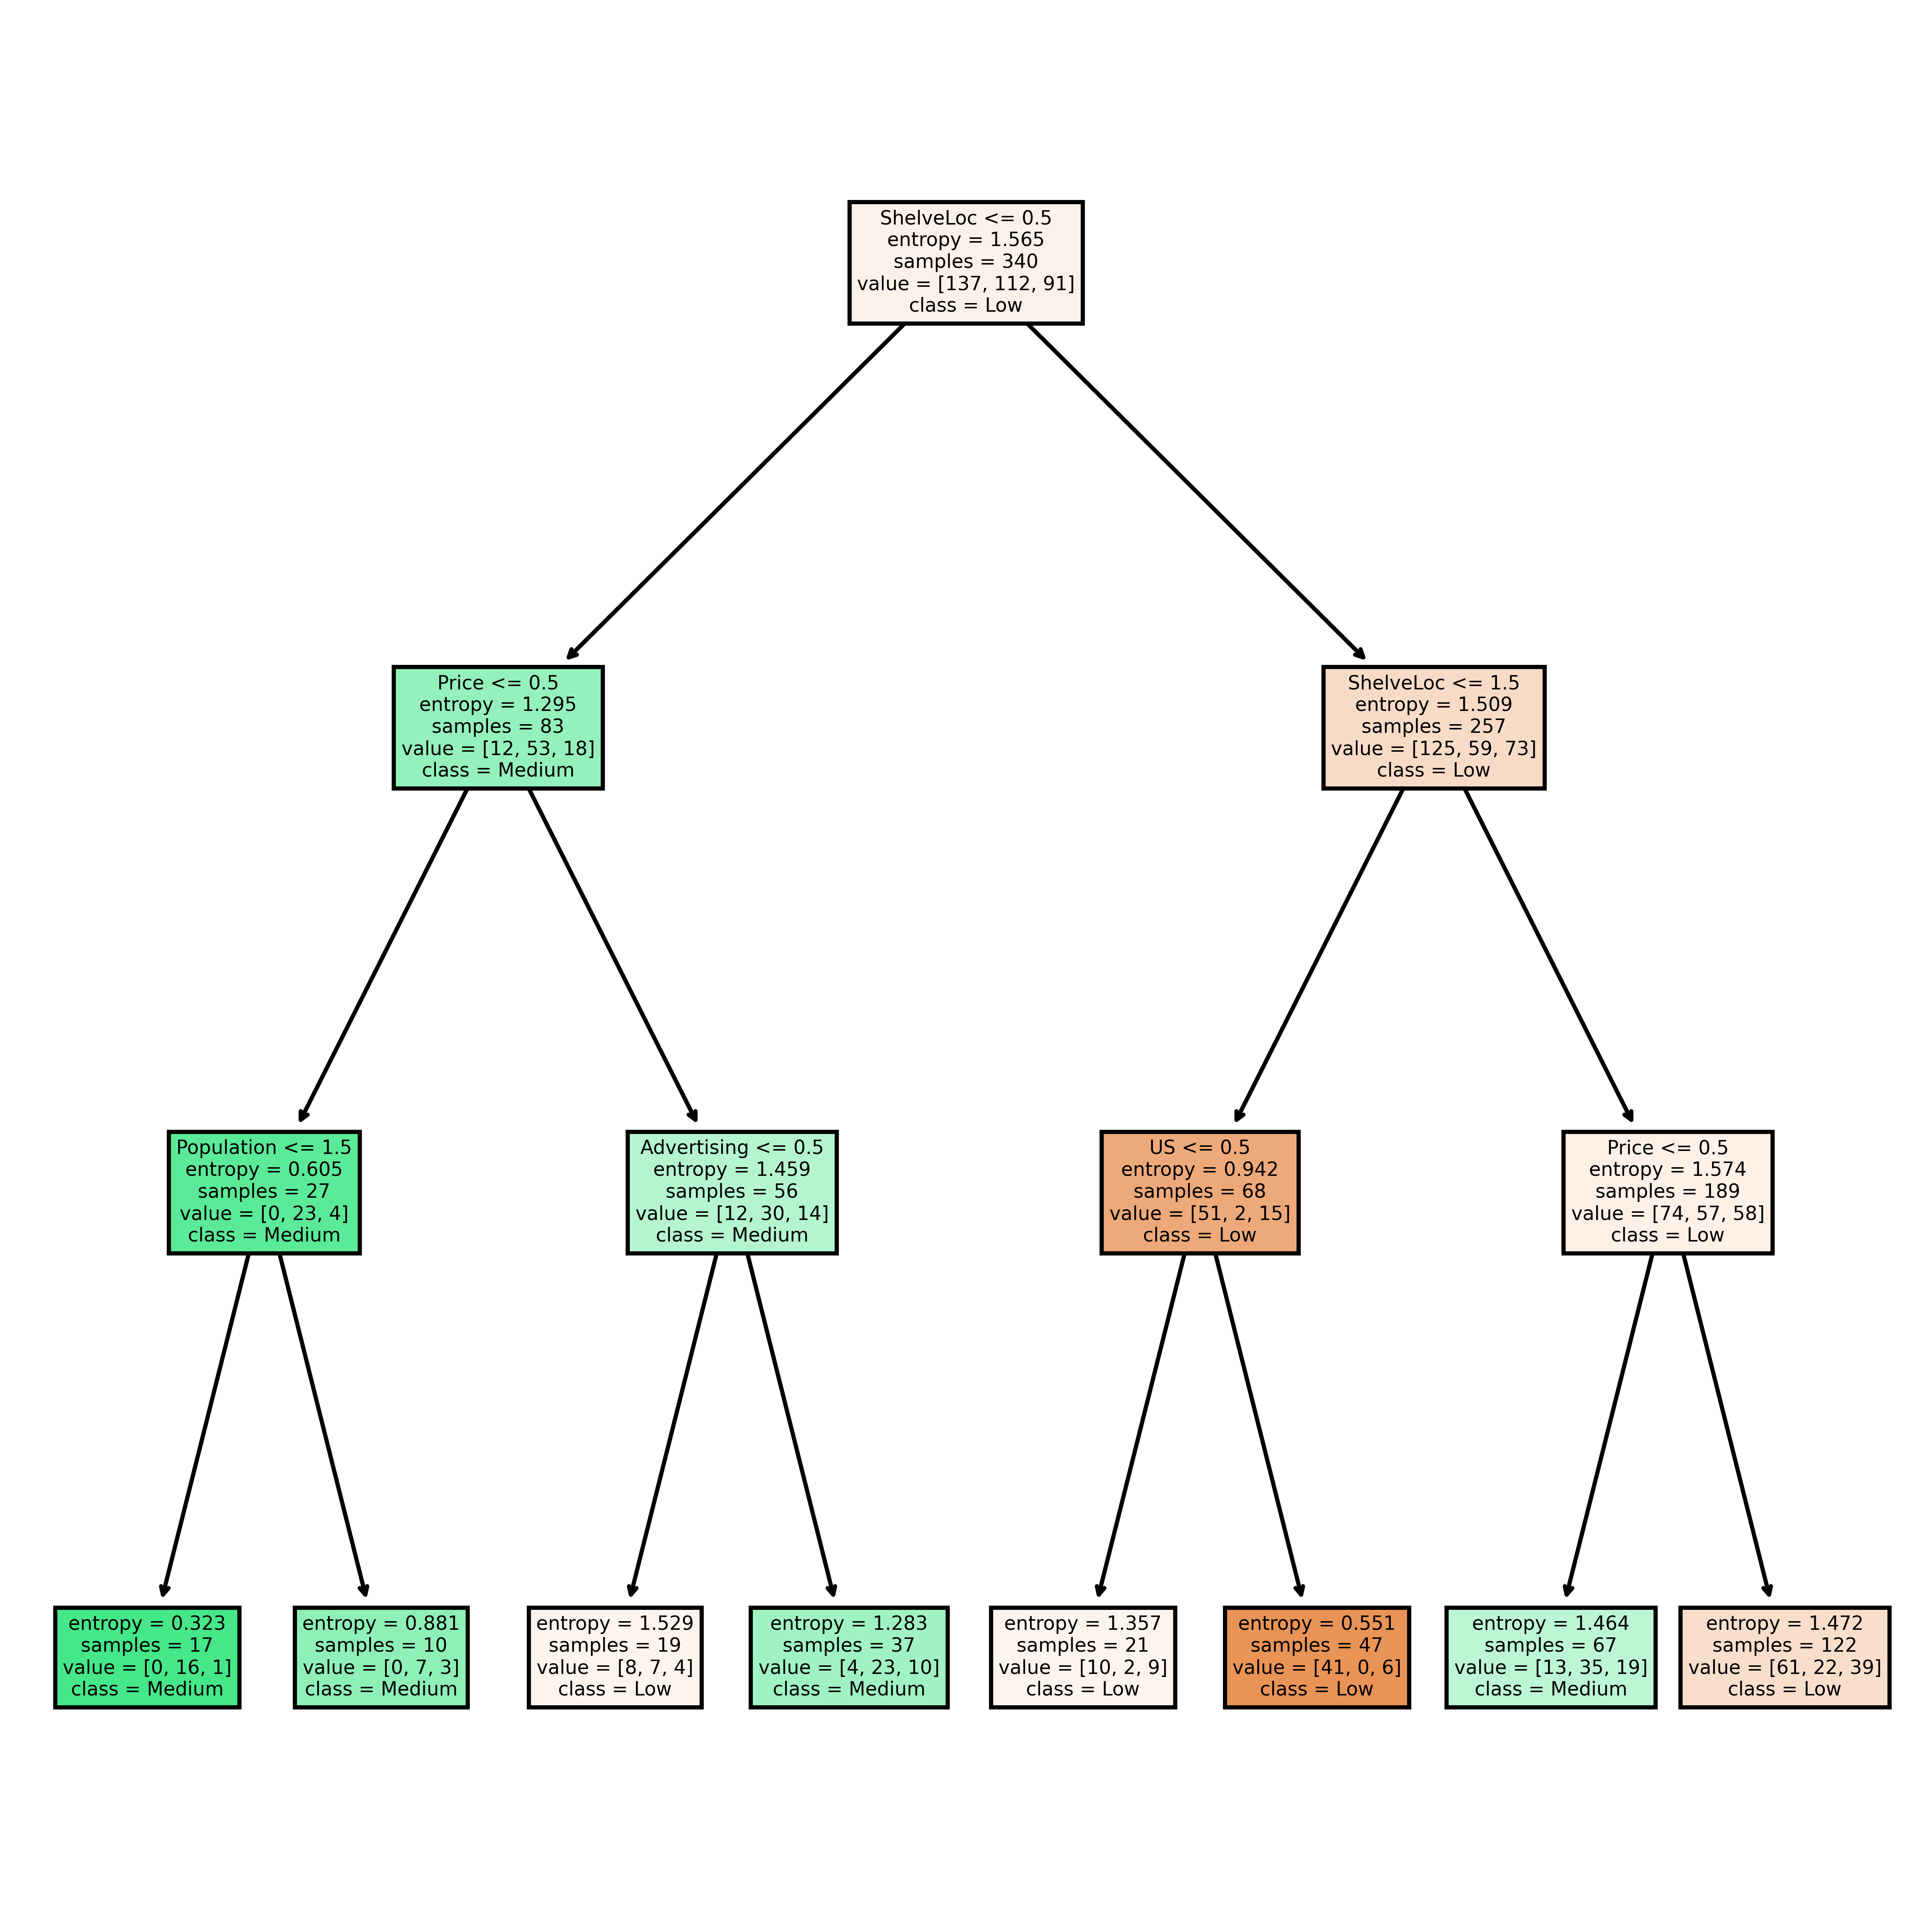

In [34]:
plot_model(ent_mod_c5)

## Test Data

In [35]:
test_pred = ent_mod_c5.predict(x_test)
print(f"The Training accuracy of the model is {ent_mod_c5.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {ent_mod_c5.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.29411764705882354

The Testing acuuracy of the model is 0.35

col_0   0  1
Sales       
0      12  0
1       5  9
2      26  8


## b. CART Algorithm 

In [36]:
gin_cart_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
gin_cart_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<Figure size 800x800 with 0 Axes>

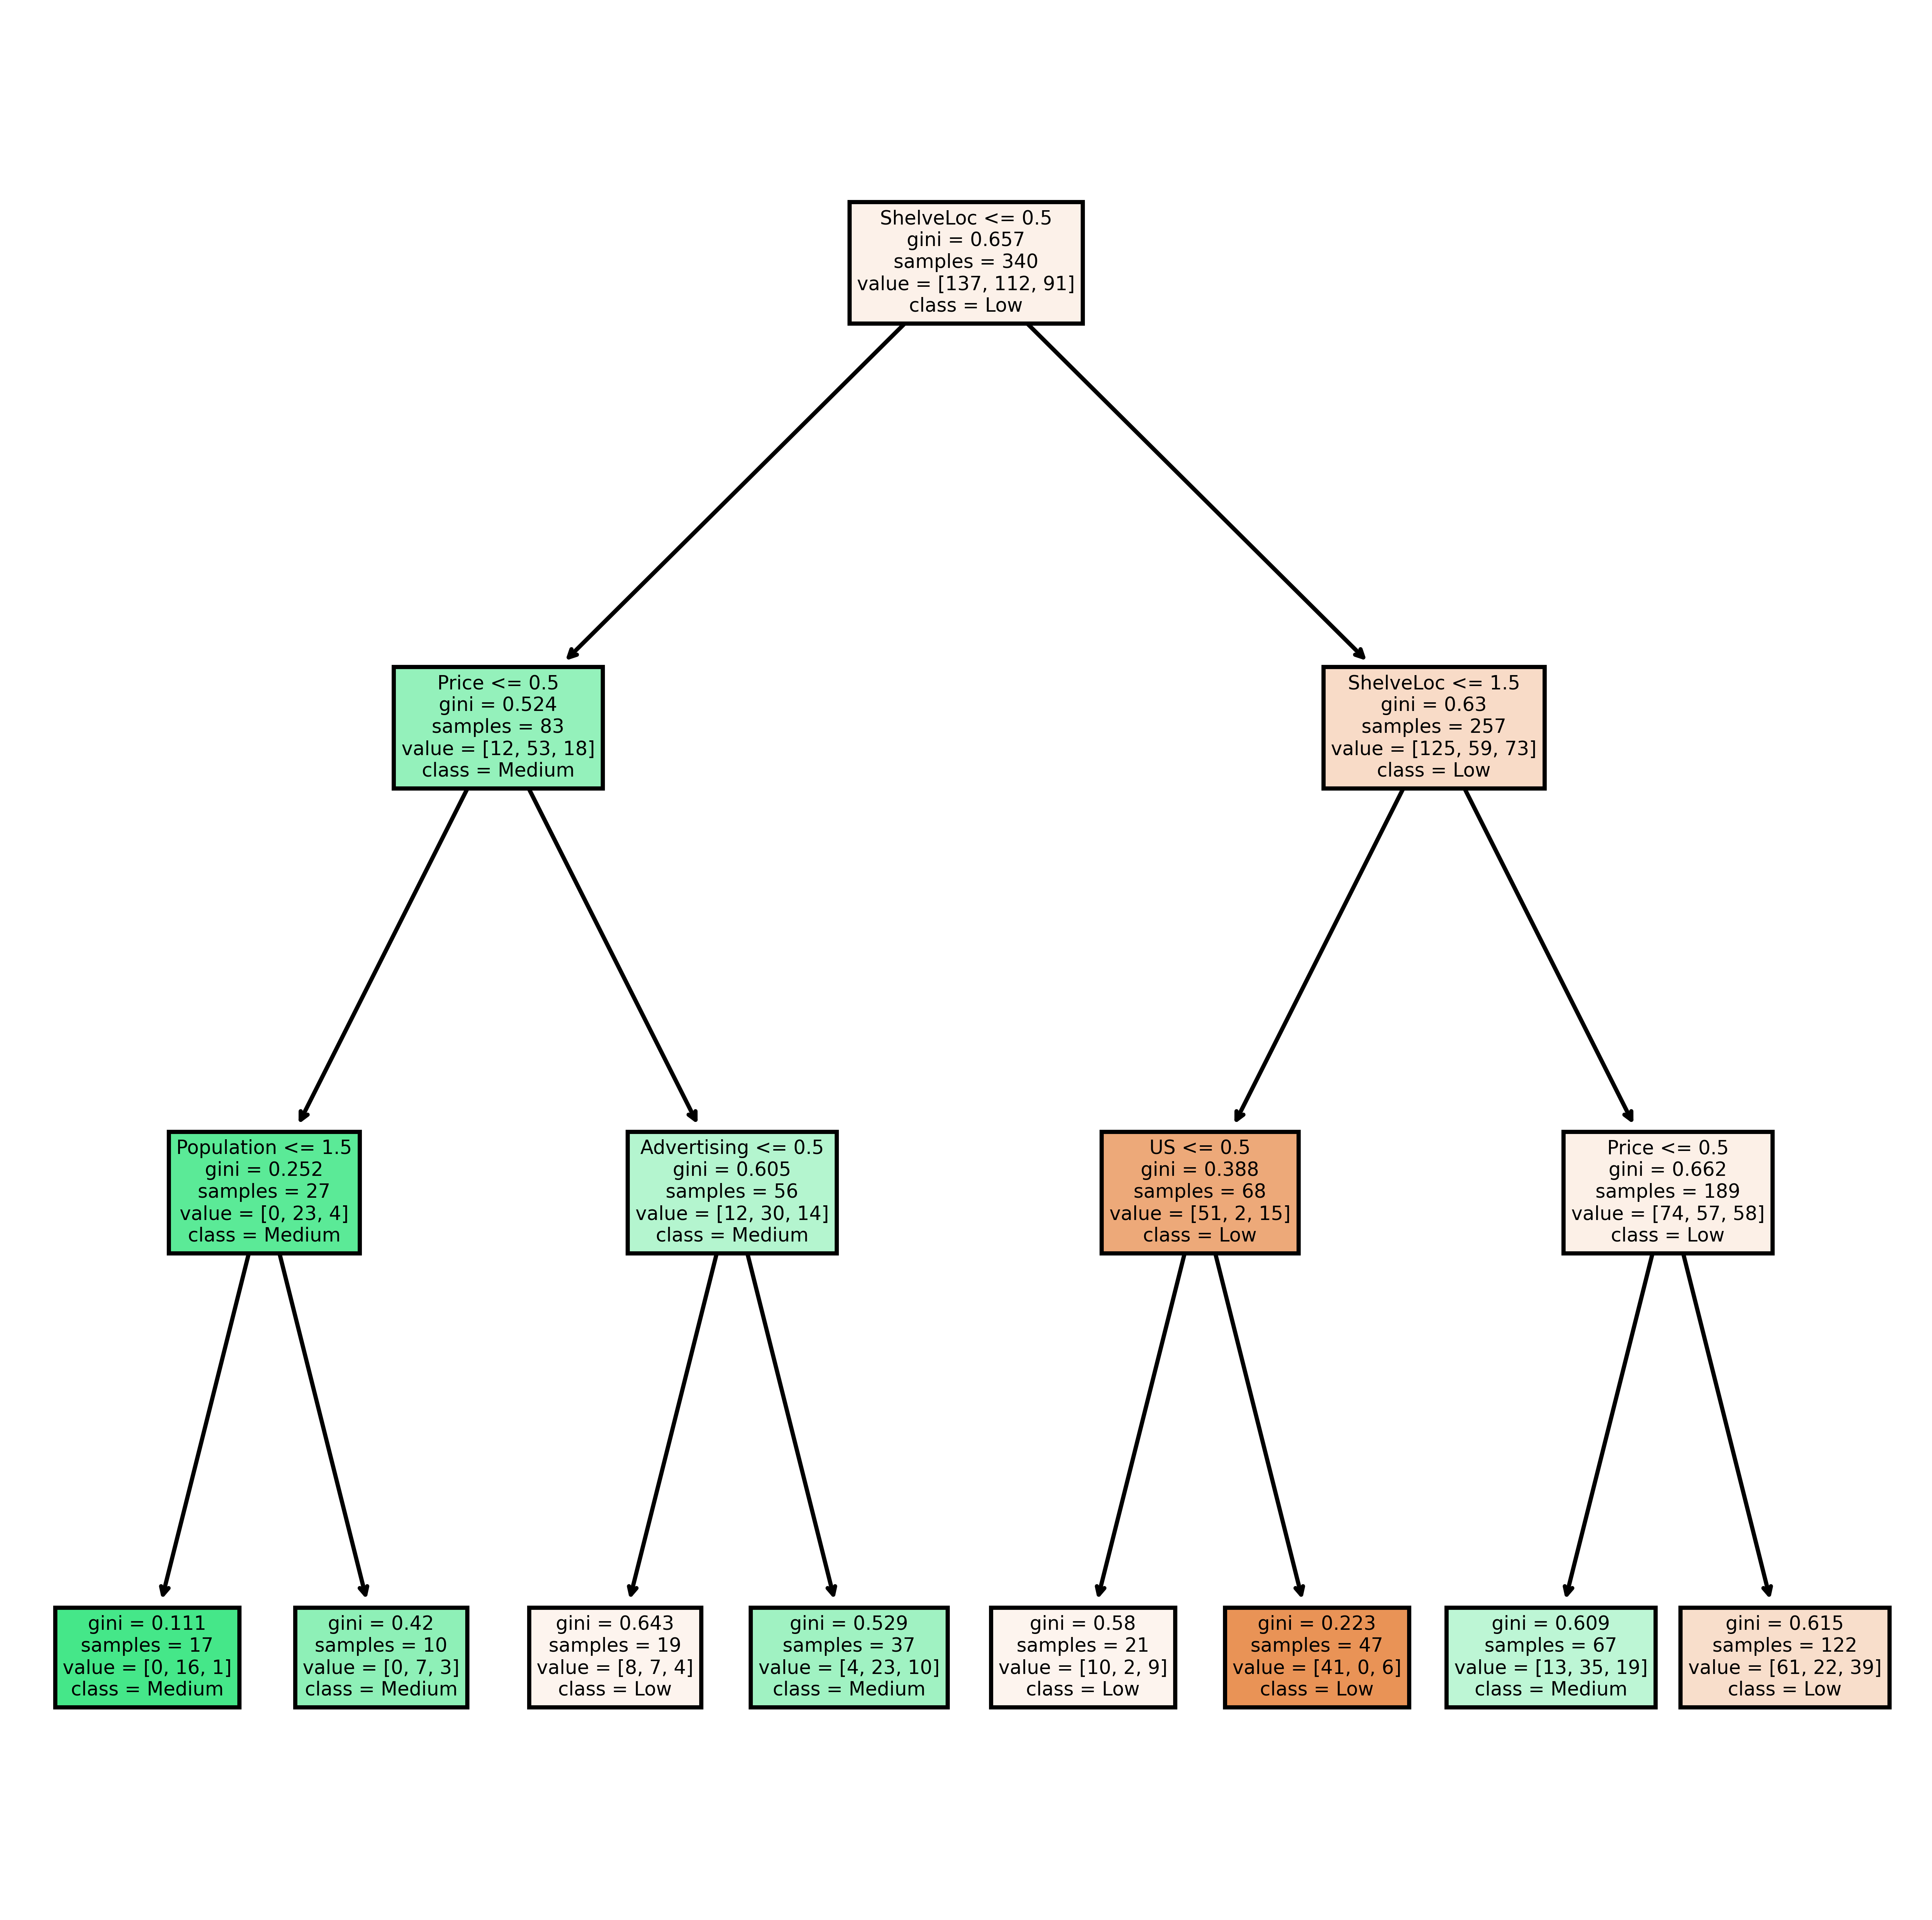

In [37]:
plot_model(gin_cart_model)

## Test Data

In [38]:
test_pred = ent_mod_c5.predict(x_test)
print(f"The Training accuracy of the model is {ent_mod_c5.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {ent_mod_c5.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.29411764705882354

The Testing acuuracy of the model is 0.35

col_0   0  1
Sales       
0      12  0
1       5  9
2      26  8


## Based on the accuracy score of Training and Testing Data it is seems best that we reply on the algorithm to decide the limits of bins and use the CART algorithm as best magnitude of training and testing accuracy is obtained in that caase for the Data